# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [4]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=0.1520563696695329, pvalue=0.9267900847658624),
 NormaltestResult(statistic=3.3670087443181043, pvalue=0.18572199532536438),
 NormaltestResult(statistic=1.189658810745713, pvalue=0.5516566675044889),
 NormaltestResult(statistic=0.23144769550889824, pvalue=0.8907211639869675)]

#### Interpret the normaltest results and make your observations.

`Comments:` Al ser los valores mayores de 0.05 no podemos rechazar la H0 con lo que podemos decir que las distribuciones son normales. Aquellas con valores mas altos tenemos mas certeza de que sigan dicha distribucion


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

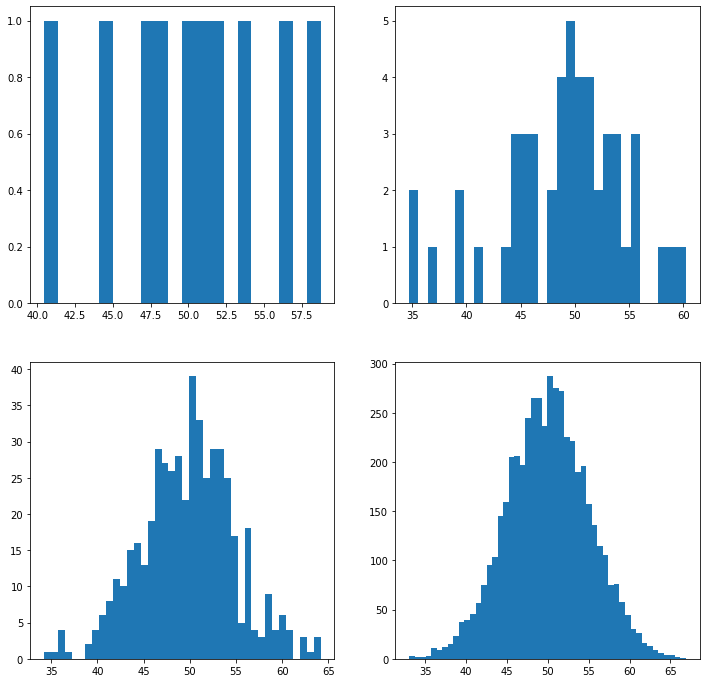

In [5]:
# Create figure and axes
fig, [(ax1, ax2),( ax3, ax4)] = plt.subplots(2, 2, figsize=(12,12))


plt.sca(ax1)
plt.hist(dists[0],20)

plt.sca(ax2)
plt.hist(dists[1],30)

plt.sca(ax3)
plt.hist(dists[2],40)

plt.sca(ax4)
plt.hist(dists[3],50)

plt.show()
# Variables

# Plot each histogram

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

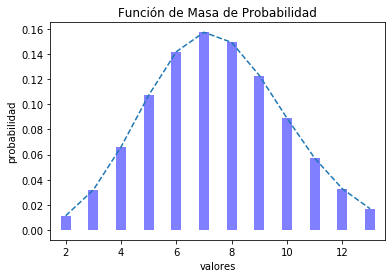

In [17]:
# Variables 


# Binomial distribution

# Plot line + bullet point -> Discrete Distribution Representation

n, p = 50, 0.15 
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
fmp = stats.binom.pmf(x, n, p)
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=10, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


#### Explain what you observe from the plot above.

`Comments:`



#### Now plot PMP with 50, 500, and 5000 visitors.

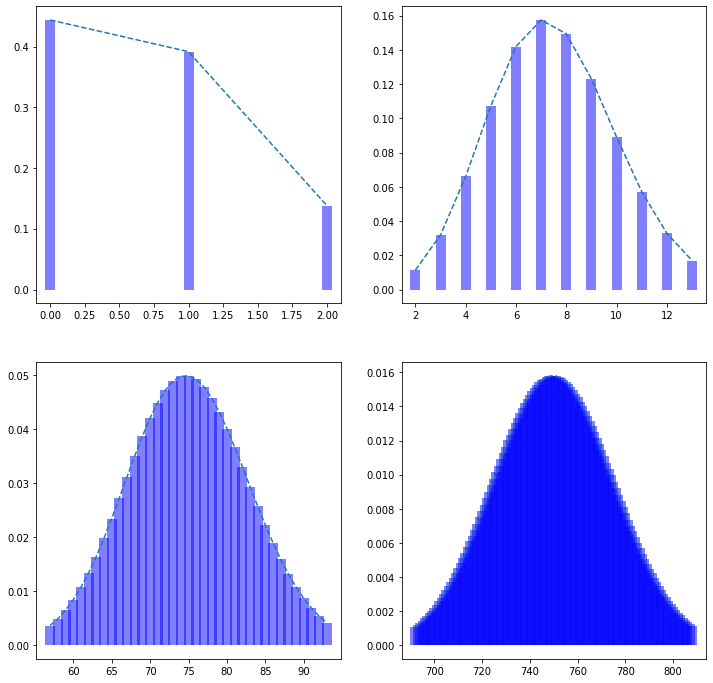

In [20]:

sample_size = [5, 50, 500, 5000]
p = 0.15 

all_x={}
fmp={}
for i in sample_size:
    all_x[i] = np.arange(stats.binom.ppf(0.01, i, p),
                  stats.binom.ppf(0.99, i, p))
    fmp[i] = stats.binom.pmf(all_x[i], i, p)


fig, [(ax1, ax2),( ax3, ax4)] = plt.subplots(2, 2, figsize=(12,12))

plt.sca(ax1)
plt.plot(all_x[5], fmp[5], '--')
plt.vlines(all_x[5], 0, fmp[5], colors='b', lw=10, alpha=0.5)

plt.sca(ax2)
plt.plot(all_x[50], fmp[50], '--')
plt.vlines(all_x[50], 0, fmp[50], colors='b', lw=10, alpha=0.5)

plt.sca(ax3)
plt.plot(all_x[500], fmp[500], '--')
plt.vlines(all_x[500], 0, fmp[500], colors='b', lw=10, alpha=0.5)

plt.sca(ax4)
plt.plot(all_x[5000], fmp[5000], '--')
plt.vlines(all_x[5000], 0, fmp[5000], colors='b', lw=10, alpha=0.5)



#### What did you notice from the distribution plots? Comment your findings.

`Comments:`


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [42]:
# Variables
mu = 300
visits = 320

poisson = stats.poisson(mu) # Distribución
fmp = poisson.pmf(visits) # Función de Masa de Probabilidad
fmp


0.011612348610402475

#### What is the probability of getting 60 visits?

In [26]:
# Variables
mu = 300
visits = 60
poisson = stats.poisson(mu) # Distribución
fmp = poisson.pmf(visits) # Función de Masa de Probabilidad
fmp

# Probability


2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

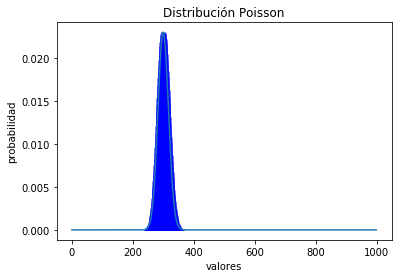

In [38]:
# Variables
visits = range(1000)
mu =  300

poisson = stats.poisson(mu) # Distribución

fmp = poisson.pmf(visits) # Función de Masa de Probabilidad
plt.plot(visits, fmp)
plt.vlines(visits, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [75]:
# Variables

norm = stats.norm(35,8)

print(f'La probabilidad es {round((norm.cdf(35)-norm.cdf(30))*100,3)}%')


La probabilidad es 23.401%


La media por el teorema del limite central es: 35.01316051997591


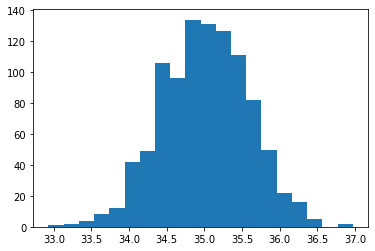

In [76]:
#Teorema limite Central
mu, sigma = 35, 8 # media y desvio estandar

datos = [np.random.normal(mu, sigma, 200).mean() for i in range(1000)]

print(f'La media por el teorema del limite central es: {sum(datos)/len(datos)}')

plt.hist(datos, 20)
plt.show()

#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [10]:
# Variables


# Probability


# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [11]:
# Variables
mu = 200
sigma = 40

# Probability


#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [12]:
# Probability


#### 3. Find the probability that the monthly sales do not exceed 150.

In [13]:
# Probability


#### 4. Find the probability that the monthly sales exceed 3000. 

In [14]:
# Probability


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [15]:
# Variables
mu = 4

# Probability


#### 2. The probability that there are at least 1 in a given month. 

In [16]:
# Probability


#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [17]:
# Probability


#### 4. The probability that there more than two in 15 days.  

In [18]:
# Probability
